In [13]:
# 📌 0. Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files


In [14]:
df = pd.read_csv("student_feedback.csv")

if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Shape: (1001, 9)
Columns: ['Student ID', 'Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']


,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


In [15]:
# 📌 1. Data Audit

df.info()
print("\nMissing values per column:\n", df.isna().sum())

dups = df["Student ID"].duplicated().sum()
print(f"\nDuplicate Student IDs: {dups}")

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Student ID                                            1001 non-null   int64
 1   Well versed with the subject                          1001 non-null   int64
 2   Explains concepts in an understandable way            1001 non-null   int64
 3   Use of presentations                                  1001 non-null   int64
 4   Degree of difficulty of assignments                   1001 non-null   int64
 5   Solves doubts willingly                               1001 non-null   int64
 6   Structuring of the course                             1001 non-null   int64
 7   Provides support for students going above and beyond  1001 non-null   int64
 8   Course recommendation based on relevance              1001 non-null   int64
dty

,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [16]:
# 📌 2. Clean & Organize

rating_cols = [c for c in df.columns if c != "Student ID"]

# Converting to numeric
df[rating_cols] = df[rating_cols].apply(pd.to_numeric, errors="coerce")

# Overall score
pos_cols = [c for c in rating_cols if "difficulty" not in c.lower()]
df["Overall Score"] = df[pos_cols].mean(axis=1)


question_summary = df[rating_cols].describe().T
question_summary


,count,mean,std,min,25%,50%,75%,max
Well versed with the subject,1001.0,7.497502,1.692998,5.0,6.0,8.0,9.0,10.0
Explains concepts in an understandable way,1001.0,6.081918,2.597168,2.0,4.0,6.0,8.0,10.0
Use of presentations,1001.0,5.942058,1.415853,4.0,5.0,6.0,7.0,8.0
Degree of difficulty of assignments,1001.0,5.430569,2.869046,1.0,3.0,5.0,8.0,10.0
Solves doubts willingly,1001.0,5.474525,2.874648,1.0,3.0,6.0,8.0,10.0
Structuring of the course,1001.0,5.636364,2.920212,1.0,3.0,6.0,8.0,10.0
Provides support for students going above and beyond,1001.0,5.662338,2.891690,1.0,3.0,6.0,8.0,10.0
Course recommendation based on relevance,1001.0,5.598402,2.886617,1.0,3.0,6.0,8.0,10.0


In [17]:
# 📌 3. Net Promoter Score (NPS)

rec = "Course recommendation based on relevance"

def nps_bucket(x):
    if x <= 4:
        return "Detractor (1-4)"
    elif x <= 7:
        return "Passive (5-7)"
    else:
        return "Promoter (8-10)"

df["NPS Bucket"] = df[rec].apply(nps_bucket)

nps_score = 100 * (
    (df["NPS Bucket"].eq("Promoter (8-10)").mean()) -
    (df["NPS Bucket"].eq("Detractor (1-4)").mean())
)

print("NPS Score:", round(nps_score,2))


NPS Score: -7.49


In [18]:
# 📌 3.1 Sentiment Analysis (Proxy from ratings)


def sentiment_label(x):
    if x >= 8:
        return "Positive"
    elif x >= 5:
        return "Neutral"
    else:
        return "Negative"

sentiment_summary = {}
for col in rating_cols:
    sentiment_summary[col] = df[col].apply(sentiment_label).value_counts(normalize=True) * 100

sentiment_df = pd.DataFrame(sentiment_summary).T.fillna(0).round(1)
sentiment_df


,Negative,Neutral,Positive
Well versed with the subject,0.0,48.9,51.1
Explains concepts in an understandable way,32.3,33.1,34.7
Use of presentations,21.8,59.9,18.3
Degree of difficulty of assignments,41.2,29.4,29.5
Solves doubts willingly,40.0,30.3,29.8
Structuring of the course,38.6,29.7,31.8
Provides support for students going above and beyond,38.7,28.7,32.7
Course recommendation based on relevance,38.8,30.0,31.3


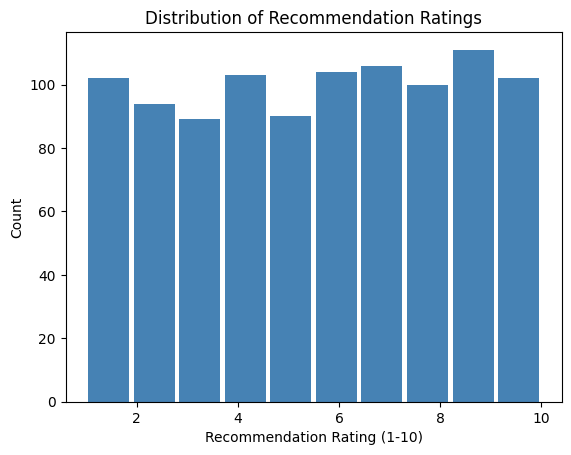

In [19]:
# 📌 4. Visualizations


# 1) Histogram of Recommendation ratings
plt.figure()
df[rec].plot(kind="hist", bins=10, rwidth=0.9, color="steelblue")
plt.xlabel("Recommendation Rating (1-10)")
plt.ylabel("Count")
plt.title("Distribution of Recommendation Ratings")
plt.show()




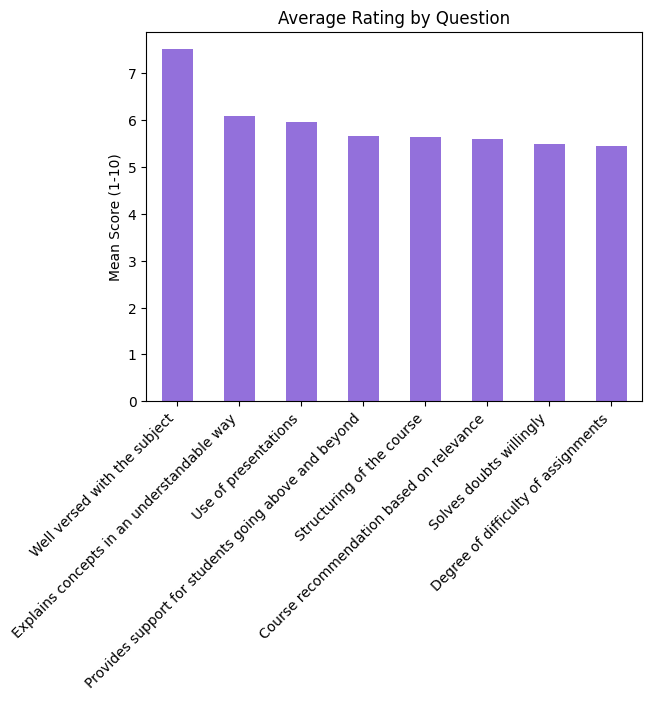

In [20]:
# 2) Average rating per question
means = df[rating_cols].mean().sort_values(ascending=False)
plt.figure()
means.plot(kind="bar", color="mediumpurple")
plt.ylabel("Mean Score (1-10)")
plt.title("Average Rating by Question")
plt.xticks(rotation=45, ha="right")
plt.show()




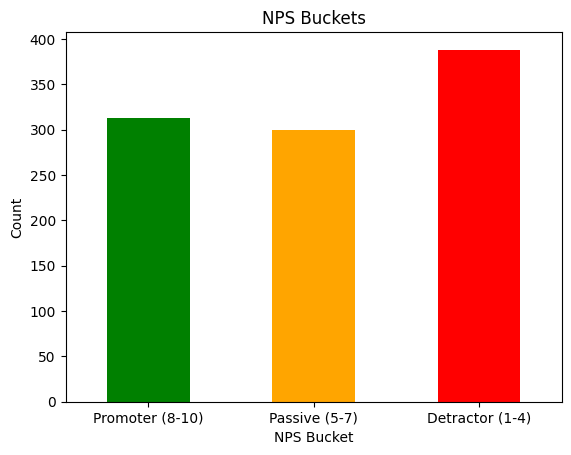

In [21]:
# 3) NPS Buckets
bucket_counts = df["NPS Bucket"].value_counts().reindex(
    ["Promoter (8-10)","Passive (5-7)","Detractor (1-4)"]
)
plt.figure()
bucket_counts.plot(kind="bar", color=["green","orange","red"])
plt.ylabel("Count")
plt.title("NPS Buckets")
plt.xticks(rotation=0)
plt.show()

In [22]:
# 📌 5. Insights & Recommendations

print("Average Overall Score (excl. difficulty):", round(df["Overall Score"].mean(),2))
print("Average Recommendation Score:", round(df[rec].mean(),2))
print("NPS Score:", round(nps_score,2))

print("\nTop Strengths:\n", means.head(3))
print("\nAreas for Improvement:\n", means.tail(3))


Average Overall Score (excl. difficulty): 5.98
Average Recommendation Score: 5.6
NPS Score: -7.49

Top Strengths:
 Well versed with the subject                  7.497502
Explains concepts in an understandable way    6.081918
Use of presentations                          5.942058
dtype: float64

Areas for Improvement:
 Course recommendation based on relevance    5.598402
Solves doubts willingly                     5.474525
Degree of difficulty of assignments         5.430569
dtype: float64


In [23]:
# 📌 6. Exporting Clean Data

df.to_csv("student_feedback_cleaned.csv", index=False)
files.download("student_feedback_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>